(82, 151)


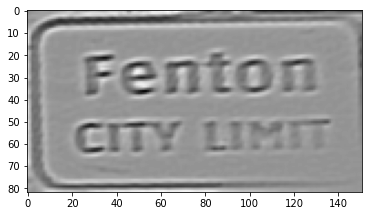

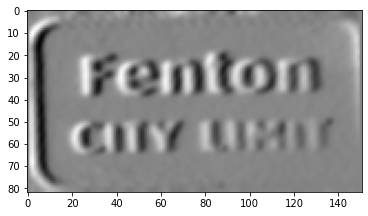

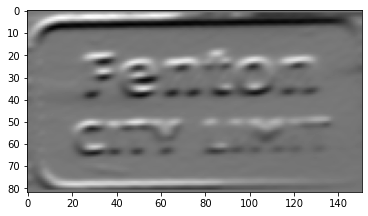

In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Sign_detection_TestSet/TestSet/10.png',0) #read image
print(img.shape)

x_sobel = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)

y_sobel = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

lapl = cv2.Laplacian(img,cv2.CV_64F, ksize=5)
#perform gaussian blur (5*5)
# blur = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
#apply adaptive threshold to image

# th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,19,0.03)
# th4 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
# th3 = cv2.bitwise_not(th3)
#Otsu method if preferred
# ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#reassign contours to the filled in image
# contours, heirar = cv2.findContours(th3, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(lapl,'gray')
plt.show()
plt.imshow(x_sobel,'gray')
plt.show()
plt.imshow(y_sobel,'gray')
plt.show()
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [18]:
import cv2

### load input image and convert it to grayscale
img = cv2.imread('Sign_detection_TestSet/TestSet/10.png')
print("img shape=", img.shape)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#### extract all contours
contours, _  = cv2.findContours(gray.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# debug: draw all contours
cv2.drawContours(img, contours, -1, (0, 0, 255), 2)
#cv2.imwrite("all_contours.jpg", img)

#### create one bounding box for every contour found
bb_list = []
for c in contours:  
    bb = cv2.boundingRect(c)
    # save all boxes except the one that has the exact dimensions of the image (x, y, width, height)
    if (bb[0] == 0 and bb[1] == 0 and bb[2] == img.shape[1] and bb[3] == img.shape[0]):
        continue
    bb_list.append(bb)

# debug: draw boxes
img_boxes = img.copy()
for bb in bb_list:
    x,y,w,h = bb
    cv2.rectangle(img_boxes, (x, y), (x+w, y+h), (0, 0, 255), 2)
#cv2.imwrite("boxes.jpg", img_boxes)    

# cv2.imshow("result2",img_boxes)

cv2.waitKey(0)
cv2.destroyAllWindows()

######################################


img shape= (82, 151, 3)


In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

train_path = './Sign_detection_TestSet/TestSet/black_bg/'
img_dir = os.listdir(train_path)

plt.figure(figsize=(20, 20))

for i in range(len(img_dir)):
    img = cv2.imread(train_path + img_dir[i],0)
    th4 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,19,0.03)
#     # Detect white regions
# #     rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
# #     dilated = cv2.dilate(img, rectKernel)
#     edged = cv2.Canny(th4, 2, 6, apertureSize=3)
#     plot_gray(dilated)
#     plt.figure(figsize=(5,5))
#     plt.imshow(edged, cmap='Greys_r')
    
    # Detect all contours in Canny-edged image
    contours, hierarchy = cv2.findContours(th4, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     image_with_contours = cv2.drawContours(img.copy(), contours, -1, (0,255,0), 3)

    # debug: draw all contours
    cv2.drawContours(img, contours, -1, (0, 0, 255), 2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

#     lapl = cv2.Laplacian(img,cv2.CV_64F, ksize=3)
#     print(lapl)


#     edges = cv2.Canny(img,20,60)
#     contours, heirar = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

#     th4 = cv2.adaptiveThreshold(lapl,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,19,0.03)
    
# # #     hsv = hsv[:,:,2]
#     plt.subplot(5, 5, i + 1)    
#     plt.imshow(contours, 'gray')
#     plt.xticks([])
#     plt.yticks([])

<Figure size 1440x1440 with 0 Axes>

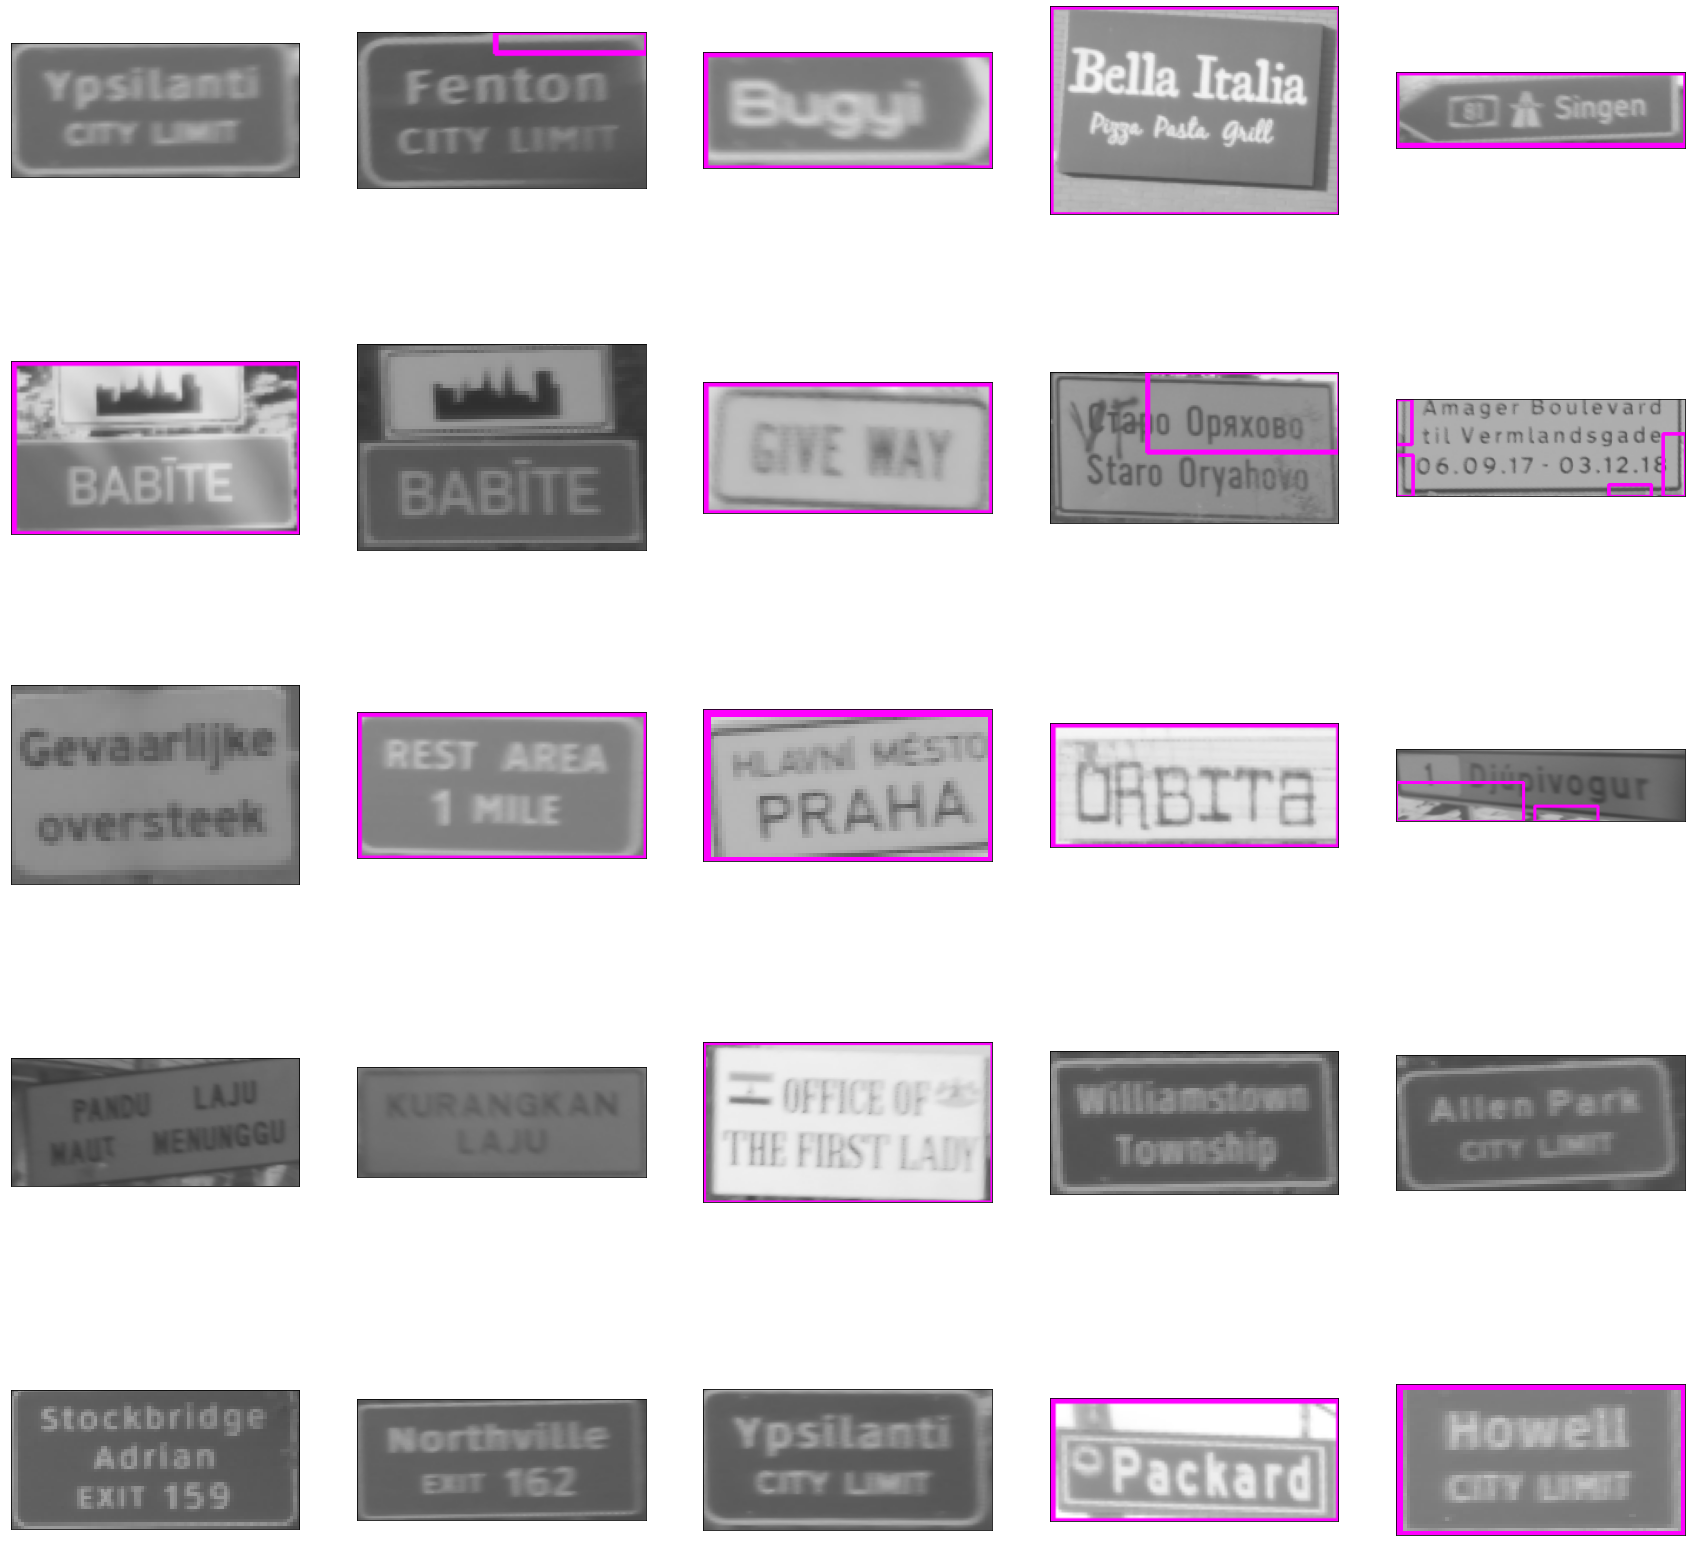

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

train_path = './Sign_detection_TestSet/TestSet/'
img_dir = os.listdir(train_path)

plt.figure(figsize=(30, 30))

for i in range(len(img_dir)):
    img = cv2.imread(train_path + img_dir[i])
    img_final = cv2.imread(train_path + img_dir[i])
    img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY)
    th = cv2.adaptiveThreshold(img2gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
    image_final = cv2.bitwise_and(img2gray, img2gray, mask=th)
    ret, new_img = cv2.threshold(image_final, 180, 255, cv2.THRESH_BINARY)  # for black text , cv.THRESH_BINARY_INV
    '''
        line  8 to 12  : Remove noisy portion 
    '''
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,
                                                     3))  # to manipulate the orientation of dilution , large x means horizonatally dilating  more, large y means vertically dilating more
    dilated = cv2.dilate(new_img, kernel, iterations=9)  # dilate , more the iteration more the dilation


    contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  # findContours returns 3 variables for getting contours

    for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)

        # Don't plot small false positives that aren't text
        if w < 35 and h < 35:
            continue

        # draw rectangle around contour on original image
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)


    plt.subplot(5, 5, i + 1)    
    plt.imshow(img, 'gray')
    plt.xticks([])
    plt.yticks([])